In [104]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import pickle
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt

In [140]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [230]:
data = pd.read_csv('file/Train.csv')
data_test = pd.read_csv('file/Test.csv')

In [84]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0
1,2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,NaN,NaN,1,0
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,2019-07-05,4.00,1,365
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,NaN,NaN,4,82
4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,2019-05-26,0.27,1,365


In [76]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.422600e+04,3.422600e+04,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,27244.000000,34226.000000,34226.000000
mean,1.898209e+07,6.733847e+07,40.729059,-73.952070,153.480979,6.953690,23.390931,1.377074,7.093905,113.301730
std,1.097597e+07,7.833091e+07,0.054604,0.046161,243.312608,20.255833,44.476822,1.688953,32.828412,131.892814
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.460366e+06,7.824440e+06,40.690040,-73.983150,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.965371e+07,3.065628e+07,40.722995,-73.955700,107.000000,2.000000,5.000000,0.730000,1.000000,45.000000
75%,2.908201e+07,1.074344e+08,40.763200,-73.935982,175.000000,5.000000,24.000000,2.020000,2.000000,229.000000
max,3.648724e+07,2.743115e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34226 entries, 0 to 34225
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34214 non-null  object 
 2   host_id                         34226 non-null  int64  
 3   host_name                       34213 non-null  object 
 4   neighbourhood_group             34226 non-null  object 
 5   neighbourhood                   34226 non-null  object 
 6   latitude                        34226 non-null  float64
 7   longitude                       34226 non-null  float64
 8   room_type                       34226 non-null  object 
 9   price                           34226 non-null  int64  
 10  minimum_nights                  34226 non-null  int64  
 11  number_of_reviews               34226 non-null  int64  
 12  last_review                     

In [78]:
data.shape

(34226, 16)

In [79]:
data['id'].nunique()

34226

In [80]:
data.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           13
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6982
reviews_per_month                 6982
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [81]:
data.nunique()

id                                34226
name                              33668
host_id                           27449
host_name                          9290
neighbourhood_group                   5
neighbourhood                       217
latitude                          16414
longitude                         12892
room_type                             3
price                               621
minimum_nights                       91
number_of_reviews                   367
last_review                        1671
reviews_per_month                   882
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [12]:
##Drop unneeded columns
data.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude'], axis=1, inplace=True)

In [13]:
data.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,Nolita,Private room,120,7,3,2015-09-01,0.06,3,0
1,Manhattan,Upper West Side,Entire home/apt,1500,1,0,NaN,NaN,1,0
2,Queens,East Elmhurst,Entire home/apt,200,2,4,2019-07-05,4.00,1,365
3,Staten Island,Concord,Shared room,30,2,0,NaN,NaN,4,82
4,Manhattan,Harlem,Shared room,115,1,16,2019-05-26,0.27,1,365


In [14]:
data.isnull().sum()/data.shape[0] *100

neighbourhood_group                0.000000
neighbourhood                      0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.399696
reviews_per_month                 20.399696
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [15]:
#lots of null values in last_review and review_per_month. let's see the data

data[(data['reviews_per_month'].isnull()) & (data['number_of_reviews']==0)]


#This is because there is no review at all for these properties


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,Manhattan,Upper West Side,Entire home/apt,1500,1,0,NaN,NaN,1,0
3,Staten Island,Concord,Shared room,30,2,0,NaN,NaN,4,82
7,Brooklyn,Fort Greene,Entire home/apt,200,5,0,NaN,NaN,1,0
10,Brooklyn,Kensington,Private room,50,14,0,NaN,NaN,1,0
39,Manhattan,Hell's Kitchen,Entire home/apt,550,30,0,NaN,NaN,65,360
...,...,...,...,...,...,...,...,...,...,...
34199,Manhattan,Midtown,Entire home/apt,239,29,0,NaN,NaN,96,333
34200,Brooklyn,Bedford-Stuyvesant,Private room,133,7,0,NaN,NaN,1,0
34201,Manhattan,Murray Hill,Entire home/apt,321,30,0,NaN,NaN,232,83
34202,Manhattan,Murray Hill,Entire home/apt,250,1,0,NaN,NaN,1,0


<AxesSubplot:ylabel='Frequency'>

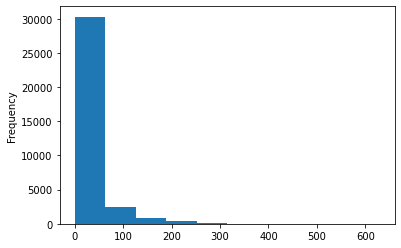

In [16]:
# Distribution of number_of_reviews
data['number_of_reviews'].plot(kind='hist')


In [17]:
data['number_of_reviews'].value_counts()

0      6982
1      3641
2      2464
3      1740
4      1407
5      1155
6       963
7       814
8       793
9       674
10      552
11      541
12      486
13      427
14      389
15      364
16      348
17      310
18      292
19      278
20      271
22      243
25      222
21      218
23      216
24      206
26      204
28      185
27      180
29      171
30      170
32      167
31      154
33      148
38      143
36      142
35      142
34      134
37      130
42      130
39      121
41      116
45      112
43      111
52      104
48      101
59      100
46       98
54       96
40       96
51       95
47       90
49       89
53       85
50       85
57       85
58       79
55       79
67       77
44       74
62       73
61       72
56       71
63       70
68       69
64       68
70       67
72       65
60       64
77       63
69       60
66       57
65       56
73       55
75       55
74       53
78       51
82       50
71       48
85       48
76       48
81       47
86       47
80  

<AxesSubplot:ylabel='Frequency'>

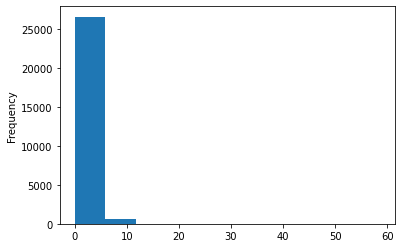

In [18]:
data['reviews_per_month'].plot(kind='hist' )

In [19]:
data['reviews_per_month'].value_counts(normalize=True)

0.05     0.023418
0.02     0.023161
1.00     0.022721
0.03     0.020628
0.16     0.017252
           ...   
9.74     0.000037
8.73     0.000037
10.05    0.000037
9.09     0.000037
9.67     0.000037
Name: reviews_per_month, Length: 882, dtype: float64

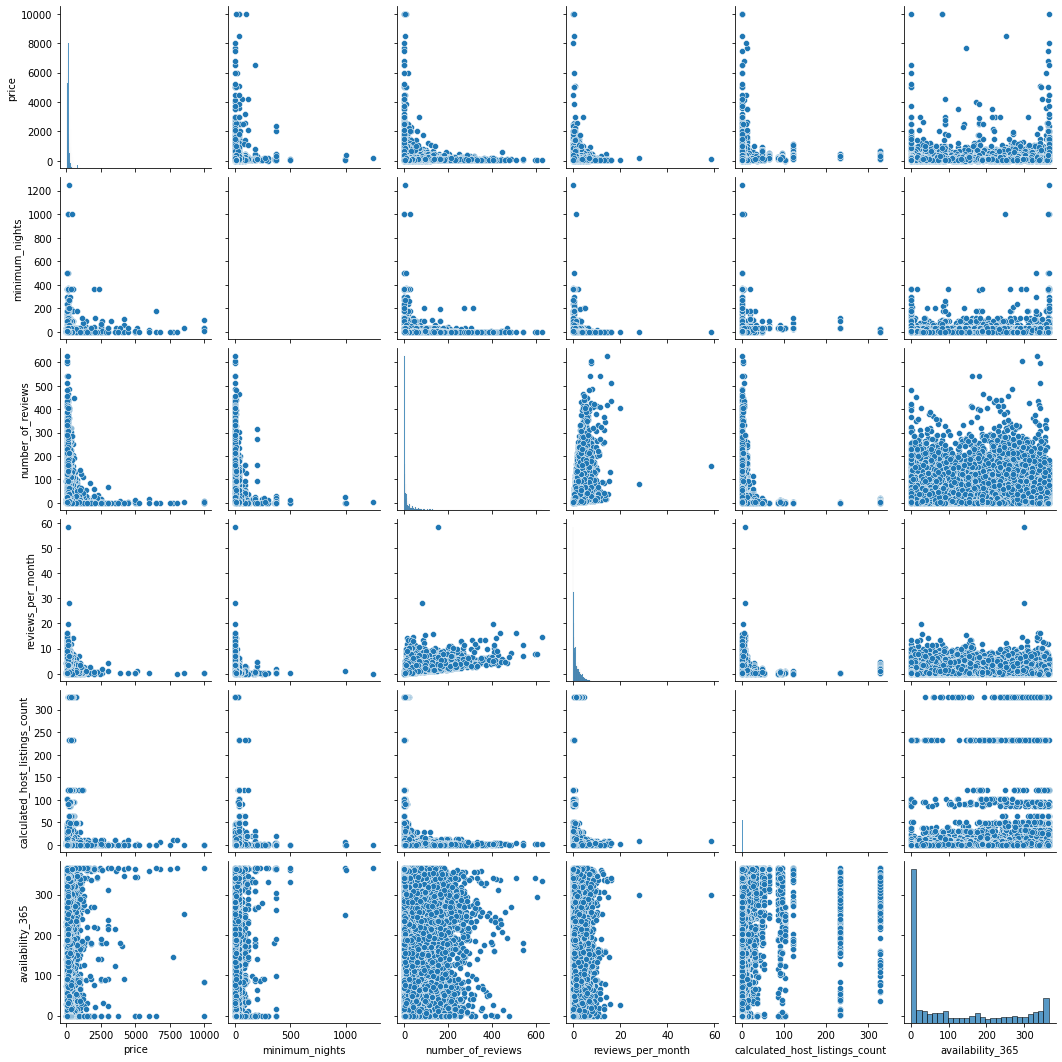

In [20]:
# Pair plot of the entire data
sns.pairplot(data)
plt.show()

<AxesSubplot:>

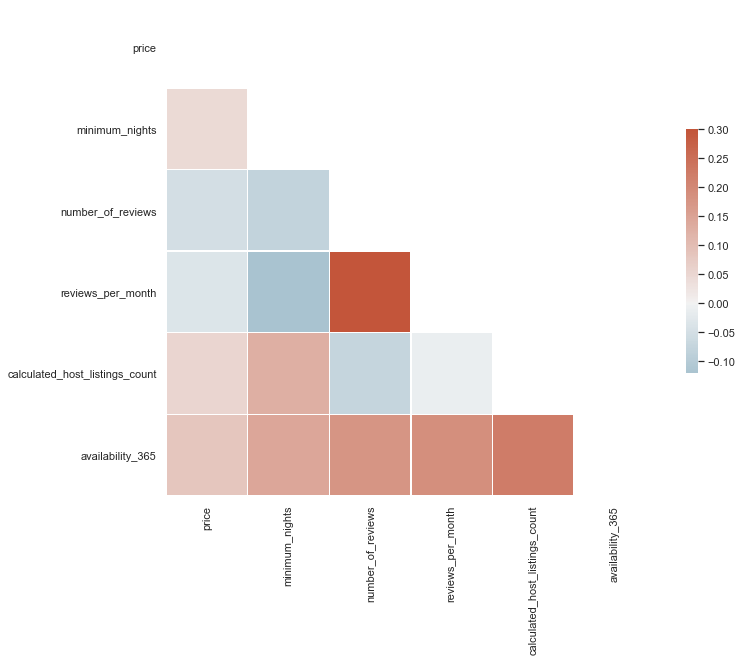

In [21]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))

corr = data.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

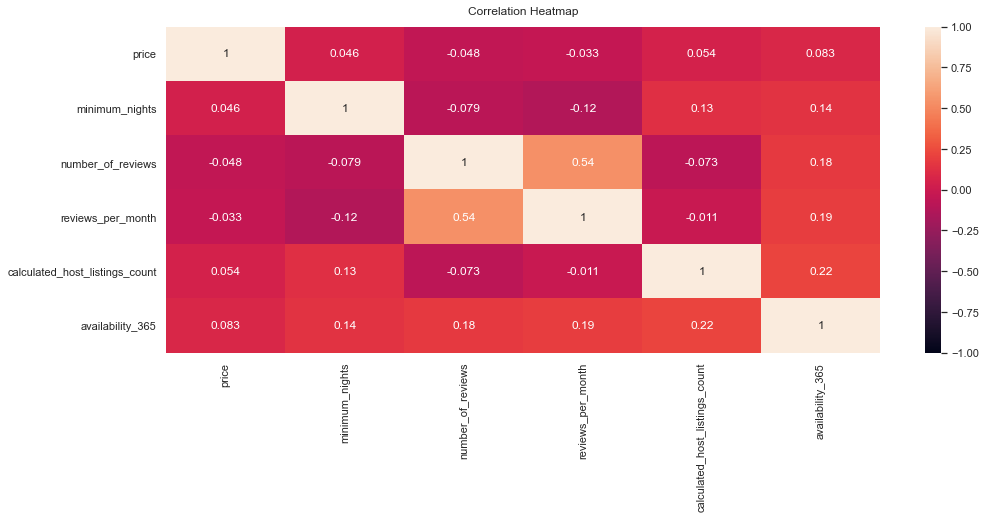

In [22]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [23]:
data.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,Nolita,Private room,120,7,3,2015-09-01,0.06,3,0
1,Manhattan,Upper West Side,Entire home/apt,1500,1,0,NaN,NaN,1,0
2,Queens,East Elmhurst,Entire home/apt,200,2,4,2019-07-05,4.00,1,365
3,Staten Island,Concord,Shared room,30,2,0,NaN,NaN,4,82
4,Manhattan,Harlem,Shared room,115,1,16,2019-05-26,0.27,1,365


In [24]:

room_types = data['room_type'].unique()


Text(0.5, 1.0, 'Price based on room type')

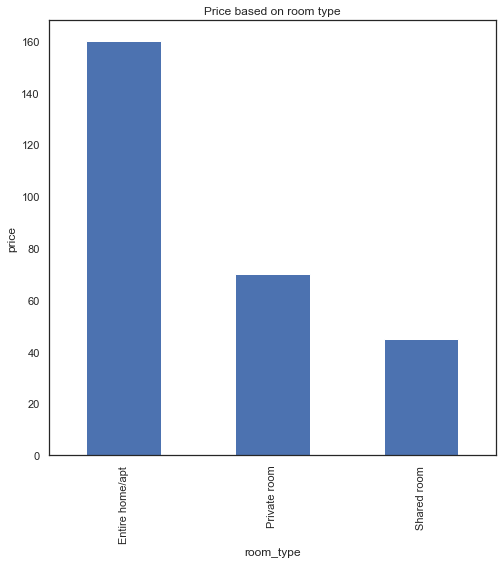

In [25]:
data.groupby('room_type')['price'].median().plot(kind='bar', figsize=(8,8))
plt.ylabel('price')
plt.title('Price based on room type')

Text(0.5, 1.0, 'Distrubution  of room type')

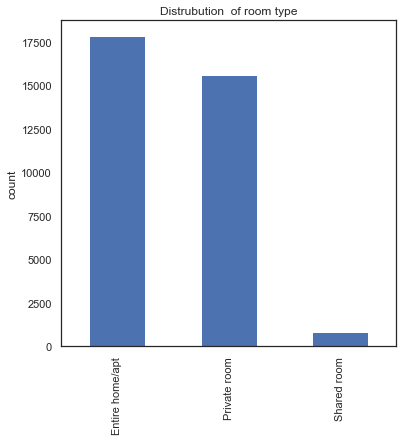

In [31]:
data['room_type'].value_counts().plot(kind='bar', figsize=(6,6))
plt.ylabel('count')
plt.title('Distrubution  of room type')

In [35]:
ax = sns.barplot(x="neighbourhood",y='price', hue="room_type", order=data.neighbourhood.groupby.iloc[:20].index, estimator=np.mean, data=data)
plt.title('Mean price based on neighbourhood  and room type')
plt.xticks(rotation=60)


AttributeError: 'function' object has no attribute 'iloc'

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Manhattan'),
  Text(1, 0, 'Queens'),
  Text(2, 0, 'Staten Island'),
  Text(3, 0, 'Brooklyn'),
  Text(4, 0, 'Bronx')])

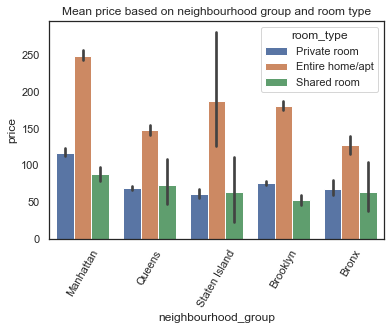

In [33]:
ax = sns.barplot(x="neighbourhood_group",y='price', hue="room_type", estimator=np.mean, data=data)
plt.title('Mean price based on neighbourhood group and room type')
plt.xticks(rotation=60)

In [36]:
data.groupby(['neighbourhood_group', 'room_type'])['price'].mean()

neighbourhood_group  room_type      
Bronx                Entire home/apt    127.455224
                     Private room        67.337691
                     Shared room         63.550000
Brooklyn             Entire home/apt    181.116525
                     Private room        76.117872
                     Shared room         52.257353
Manhattan            Entire home/apt    249.621554
                     Private room       117.323456
                     Shared room         88.429412
Queens               Entire home/apt    148.470746
                     Private room        68.716412
                     Shared room         73.767123
Staten Island        Entire home/apt    187.964286
                     Private room        61.198473
                     Shared room         63.400000
Name: price, dtype: float64

In [37]:
data.groupby('room_type')['price'].median()

room_type
Entire home/apt    160
Private room        70
Shared room         45
Name: price, dtype: int64

Text(0.5, 1.0, 'Price based on neighbourhood Group')

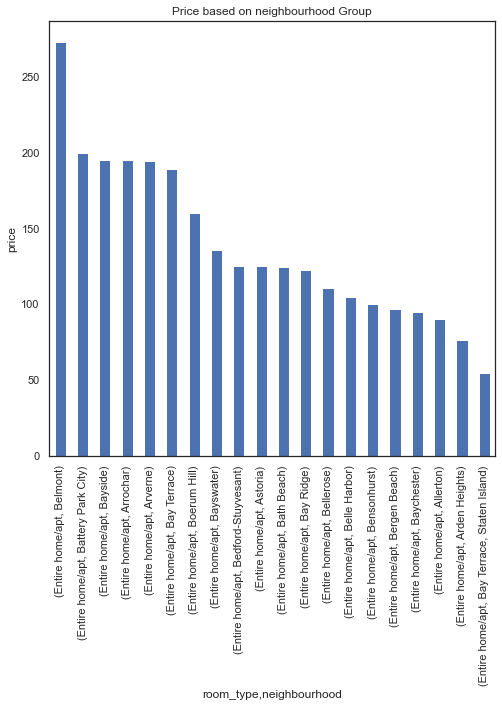

In [38]:
data.groupby(['room_type','neighbourhood'])['price'].median()[:20].sort_values(ascending=False).plot(kind='bar', figsize=(8,8))
plt.ylabel('price')
plt.title('Price based on neighbourhood Group')

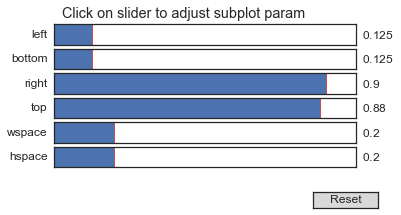

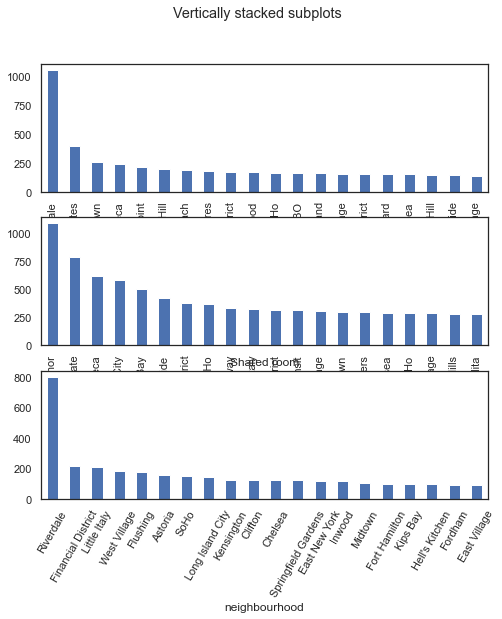

In [39]:
fig, axes = plt.subplots(3)
fig.suptitle('Vertically stacked subplots')
room_types = data.room_type.unique()
i = 0
for room in room_types:
    plt.title(room)
    data[data['room_type']==room].groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:20]\
    .plot(ax=axes[i],kind='bar', figsize=(8,8))
    plt.xticks(rotation=60)
    i+=1
plt.subplot_tool()

In [40]:
room_types

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [41]:
private_room_loc = set(data[data['room_type']=='Private room'].groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:20].index)
entire_home_loc = set(data[data['room_type']=='Entire home/apt'].groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:20].index)

shared_room_loc = set(data[data['room_type']=='Shared room'].groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:20].index)



In [42]:
private_room_loc.intersection(entire_home_loc).intersection(shared_room_loc)


{'Chelsea', 'Midtown', 'West Village'}

In [43]:
#check for highly skewed features
from scipy.stats import norm, skew
numeric_feats = data.dtypes[data.dtypes != 'object'].index
skewed_feats = data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_feats[abs(skewed_feats) > 0.5]
high_skew

minimum_nights                    23.998216
price                             18.814269
calculated_host_listings_count     7.969358
number_of_reviews                  3.645205
availability_365                   0.755958
dtype: float64

//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

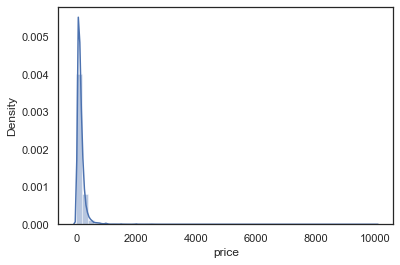

In [46]:
 sns.distplot(data['price'])

In [47]:
np.sort(data[data['neighbourhood_group']=='Manhattan']['neighbourhood'].unique())

array(['Battery Park City', 'Chelsea', 'Chinatown', 'Civic Center',
       'East Harlem', 'East Village', 'Financial District',
       'Flatiron District', 'Gramercy', 'Greenwich Village', 'Harlem',
       "Hell's Kitchen", 'Inwood', 'Kips Bay', 'Little Italy',
       'Lower East Side', 'Marble Hill', 'Midtown', 'Morningside Heights',
       'Murray Hill', 'NoHo', 'Nolita', 'Roosevelt Island', 'SoHo',
       'Stuyvesant Town', 'Theater District', 'Tribeca', 'Two Bridges',
       'Upper East Side', 'Upper West Side', 'Washington Heights',
       'West Village'], dtype=object)

In [48]:
data[data['neighbourhood']=='Bay Terrace']

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
6395,Queens,Bay Terrace,Entire home/apt,184,3,146,2019-06-19,2.46,1,143
17274,Queens,Bay Terrace,Entire home/apt,189,3,85,2019-06-15,1.88,1,330
26667,Queens,Bay Terrace,Entire home/apt,258,1,0,NaN,NaN,1,362


In [86]:
data1 = pd.get_dummies(data, columns=['room_type'])


In [50]:
data1

,neighbourhood_group,neighbourhood,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Manhattan,Nolita,120,7,3,2015-09-01,0.06,3,0,0,1,0
1,Manhattan,Upper West Side,1500,1,0,NaN,NaN,1,0,1,0,0
2,Queens,East Elmhurst,200,2,4,2019-07-05,4.00,1,365,1,0,0
3,Staten Island,Concord,30,2,0,NaN,NaN,4,82,0,0,1
4,Manhattan,Harlem,115,1,16,2019-05-26,0.27,1,365,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34221,Queens,Ridgewood,80,5,2,2018-09-30,0.21,1,0,1,0,0
34222,Manhattan,Upper West Side,137,1,163,2019-06-28,3.55,1,32,0,1,0
34223,Manhattan,Inwood,195,2,6,2019-03-31,0.53,1,0,1,0,0
34224,Brooklyn,Bushwick,80,3,0,NaN,NaN,1,0,0,1,0


In [87]:
data1.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
id,1.000000,0.587556,0.002922,0.093288,0.010100,-0.010127,-0.320246,0.292524,0.131495,0.084583,-0.054457,0.036643,0.059166
host_id,0.587556,1.000000,0.021635,0.128007,0.013679,-0.013519,-0.142471,0.293044,0.154071,0.199093,-0.075573,0.054227,0.071001
latitude,0.002922,0.021635,1.000000,0.085919,0.029195,0.024725,-0.014016,-0.004404,0.018272,-0.012063,-0.007143,0.004867,0.007561
longitude,0.093288,0.128007,0.085919,1.000000,-0.151930,-0.063447,0.055632,0.141266,-0.114418,0.085315,-0.190317,0.182414,0.027934
price,0.010100,0.013679,0.029195,-0.151930,1.000000,0.045746,-0.048459,-0.033186,0.053688,0.083439,0.255834,-0.240869,-0.051834
minimum_nights,-0.010127,-0.013519,0.024725,-0.063447,0.045746,1.000000,-0.078890,-0.120635,0.128552,0.142466,0.078681,-0.078305,-0.002038
number_of_reviews,-0.320246,-0.142471,-0.014016,0.055632,-0.048459,-0.078890,1.000000,0.544709,-0.072643,0.176161,-0.010329,0.018241,-0.025927
reviews_per_month,0.292524,0.293044,-0.004404,0.141266,-0.033186,-0.120635,0.544709,1.000000,-0.010535,0.187968,-0.037331,0.035075,0.008097
calculated_host_listings_count,0.131495,0.154071,0.018272,-0.114418,0.053688,0.128552,-0.072643,-0.010535,1.000000,0.223409,0.111603,-0.108349,-0.011839
availability_365,0.084583,0.199093,-0.012063,0.085315,0.083439,0.142466,0.176161,0.187968,0.223409,1.000000,-0.010542,-0.006699,0.056836


In [ ]:
#1. Create an extra feature time duration
#2. For highly skewed feature take log.
#3. do one hot enc categorical field
#4. bucketize the feature. nummber of features


In [106]:
data1 = data.copy()
data1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0
1,2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,NaN,NaN,1,0
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,2019-07-05,4.00,1,365
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,NaN,NaN,4,82
4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,2019-05-26,0.27,1,365


In [107]:
data1['last_review'] = pd.to_datetime(data1['last_review'])



In [231]:
data_test['last_review'] = pd.to_datetime(data_test['last_review'])

In [108]:
max_date=data1['last_review'].max()
max_date

Timestamp('2019-07-08 00:00:00')

In [232]:
max_date_test=data_test['last_review'].max()
max_date_test

Timestamp('2019-07-08 00:00:00')

In [109]:
data1['num_months'] = data1['last_review'].map(lambda x:(max_date.year - x.year) * 12 + (max_date.month - x.month))

In [233]:
data_test['num_months'] = data_test['last_review'].map(lambda x:(max_date.year - x.year) * 12 + (max_date.month - x.month))

In [234]:
id = data_test['id']

In [110]:
data1['num_months']

0        46.0
1         NaN
2         0.0
3         NaN
4         2.0
         ... 
34221    10.0
34222     1.0
34223     4.0
34224     NaN
34225    32.0
Name: num_months, Length: 34226, dtype: float64

In [121]:
data1['num_months']= data1['num_months'].fillna(data1['num_months'].max()+10)
data1['reviews_per_month'] = data1['reviews_per_month'].fillna(0)

In [235]:
data_test['num_months']= data_test['num_months'].fillna(data_test['num_months'].max()+10)
data_test['reviews_per_month'] = data_test['reviews_per_month'].fillna(0)

In [112]:
data1.drop(['last_review', 'id', 'name', 'host_id', 'host_name', 'latitude', 'longitude','neighbourhood'], axis = 1, inplace = True) 


In [236]:
data_test.drop(['last_review', 'id', 'name', 'host_id', 'host_name', 'latitude', 'longitude','neighbourhood'], axis = 1, inplace = True) 


In [113]:
data1 = pd.get_dummies(data1, columns=['neighbourhood_group','room_type'])

In [237]:
data_test = pd.get_dummies(data_test, columns=['neighbourhood_group','room_type'])

In [123]:
data1.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,num_months,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,120,7,3,0.06,3,0,46.0,0,0,1,0,0,0,1,0
1,1500,1,0,0.00,1,0,110.0,0,0,1,0,0,1,0,0
2,200,2,4,4.00,1,365,0.0,0,0,0,1,0,1,0,0
3,30,2,0,0.00,4,82,110.0,0,0,0,0,1,0,0,1
4,115,1,16,0.27,1,365,2.0,0,0,1,0,0,0,0,1


In [122]:
data1.isnull().sum()

price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
num_months                           0
neighbourhood_group_Bronx            0
neighbourhood_group_Brooklyn         0
neighbourhood_group_Manhattan        0
neighbourhood_group_Queens           0
neighbourhood_group_Staten Island    0
room_type_Entire home/apt            0
room_type_Private room               0
room_type_Shared room                0
dtype: int64

In [124]:
data1['num_months'].corr(data1['price'])

0.08962225869322953

In [125]:
data1.corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,num_months,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
price,1.000000,0.045746,-0.048459,-0.052865,0.053688,0.083439,0.089622,-0.040656,-0.094605,0.160660,-0.081788,-0.012286,0.255834,-0.240869,-0.051834
minimum_nights,0.045746,1.000000,-0.078890,-0.123140,0.128552,0.142466,0.120027,-0.017361,-0.038807,0.069209,-0.036299,-0.012815,0.078681,-0.078305,-0.002038
number_of_reviews,-0.048459,-0.078890,1.000000,0.584707,-0.072643,0.176161,-0.333359,0.013591,0.017625,-0.044144,0.030696,0.016583,-0.010329,0.018241,-0.025927
reviews_per_month,-0.052865,-0.123140,0.584707,1.000000,-0.048281,0.165891,-0.449520,0.039182,-0.022171,-0.062042,0.104903,0.026925,-0.025320,0.025736,-0.001111
calculated_host_listings_count,0.053688,0.128552,-0.072643,-0.048281,1.000000,0.223409,0.104400,-0.022105,-0.123349,0.152513,-0.033613,-0.012438,0.111603,-0.108349,-0.011839
availability_365,0.083439,0.142466,0.176161,0.165891,0.223409,1.000000,-0.111664,0.065352,-0.076283,-0.009390,0.086384,0.056643,-0.010542,-0.006699,0.056836
num_months,0.089622,0.120027,-0.333359,-0.449520,0.104400,-0.111664,1.000000,-0.017937,-0.043975,0.073874,-0.032091,-0.025085,-0.013916,0.009113,0.015947
neighbourhood_group_Bronx,-0.040656,-0.017361,0.013591,0.039182,-0.022105,0.065352,-0.017937,1.000000,-0.126216,-0.135272,-0.054961,-0.012935,-0.051980,0.043418,0.028697
neighbourhood_group_Brooklyn,-0.094605,-0.038807,0.017625,-0.022171,-0.123349,-0.076283,-0.043975,-0.126216,1.000000,-0.744806,-0.302615,-0.071220,-0.071238,0.078285,-0.022464
neighbourhood_group_Manhattan,0.160660,0.069209,-0.044144,-0.062042,0.152513,-0.009390,0.073874,-0.135272,-0.744806,1.000000,-0.324328,-0.076330,0.157347,-0.155889,-0.006392


In [144]:
def get_best_features(df, n=10):
    df1 = df.copy().select_dtypes(include=np.number)
    X = df1.copy()  #independent columns
    X.drop('price', axis=1, inplace=True)
    y = df1['price']    #target column 
    #apply SelectKBest class to extract top n best features
    bestfeatures = SelectKBest(score_func=chi2, k=n)
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    print(featureScores.nlargest(n,'Score'))  #print n best features
    return featureScores.nlargest(n,'Score')

In [133]:
def get_feature_importance(df, k=15):
    df1 = df.copy().select_dtypes(include=np.number)
    X = df1.copy()  #independent columns
    X.drop('price', axis=1, inplace=True)
    y = df1['price']    #target column 
    model = ExtraTreesClassifier()
    model.fit(X,y)
    print(model.feature_importances_)
    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(k).plot(kind='barh')
    plt.show()
    

[0.15812369 0.17567974 0.21257272 0.07884905 0.21584622 0.14519255
 0.00064911 0.00105475 0.00182301 0.0008729  0.00044761 0.0045434
 0.00371156 0.0006337 ]


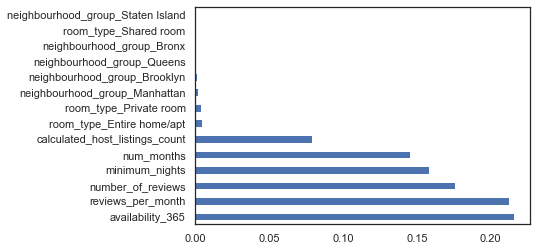

In [135]:
get_feature_importance(data1)

In [145]:
best_features = get_best_features(data1)

                             Specs         Score
3   calculated_host_listings_count  1.643794e+06
4                 availability_365  2.965973e+05
5                       num_months  1.044452e+05
1                number_of_reviews  9.908544e+04
0                   minimum_nights  7.821525e+04
12          room_type_Private room  8.269750e+03
11       room_type_Entire home/apt  8.135898e+03
13           room_type_Shared room  4.150064e+03
8    neighbourhood_group_Manhattan  2.845263e+03
2                reviews_per_month  2.459251e+03


In [148]:
best_features = list(best_features['Specs'])

['calculated_host_listings_count',
 'availability_365',
 'num_months',
 'number_of_reviews',
 'minimum_nights',
 'room_type_Private room',
 'room_type_Entire home/apt',
 'room_type_Shared room',
 'neighbourhood_group_Manhattan',
 'reviews_per_month']

In [160]:
data2 = data1[['calculated_host_listings_count',
 'availability_365',
 'num_months',
 'number_of_reviews',
 'minimum_nights',
 'room_type_Private room',
 'room_type_Entire home/apt',
 'room_type_Shared room',
 'neighbourhood_group_Manhattan',
 'reviews_per_month']]

In [238]:
data_test = data_test[['calculated_host_listings_count',
 'availability_365',
 'num_months',
 'number_of_reviews',
 'minimum_nights',
 'room_type_Private room',
 'room_type_Entire home/apt',
 'room_type_Shared room',
 'neighbourhood_group_Manhattan',
 'reviews_per_month']]

In [161]:
data2.head()

,calculated_host_listings_count,availability_365,num_months,number_of_reviews,minimum_nights,room_type_Private room,room_type_Entire home/apt,room_type_Shared room,neighbourhood_group_Manhattan,reviews_per_month
0,3,0,46.0,3,7,1,0,0,1,0.06
1,1,0,110.0,0,1,0,1,0,1,0.00
2,1,365,0.0,4,2,0,1,0,0,4.00
3,4,82,110.0,0,2,0,0,1,0,0.00
4,1,365,2.0,16,1,0,0,1,1,0.27


In [178]:
X = data2.copy()
y = data1['price']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [179]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,accuracy_score

In [180]:
# Initializing the Linear regression model
lr = LinearRegression()
# Fitting the data
lr.fit(X_train,y_train)
# Getting the predictions on the test data
y_pred = lr.predict(X_val)
# Finding the RMSE
rmse_lr = mean_squared_error(y_val,y_pred) ** 0.5

print(rmse_lr)

202.61170995176764


In [181]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train,y_train)

y_pred_gbr = gbr.predict(X_val)

rmse_gbr = mean_squared_error(y_val,y_pred_gbr) ** 0.5

print(rmse_gbr)

212.5646403509786


In [239]:
data_test.shape

(14669, 10)

In [240]:
y_final = lr.predict(data_test)

In [241]:
len()y_final

14669

In [242]:
len(id)

14669

In [243]:
data_final = {"id": id, 
        "price": pd.Series(y_final) 
       } 
data_final = pd.concat(data_final, 
               axis = 1) 
data_final.head()

data_final.to_csv('submission.csv', index=False)